# The Data

CIFAR-10 is a dataset of 50,000 32x32 color training images, labeled over 10 categories, and 10,000 test images.

In [1]:
import pandas as pd
import numpy as np

In [2]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 164s 1us/step


In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_train[0].shape

(32, 32, 3)

In [5]:
import matplotlib.pyplot as plt

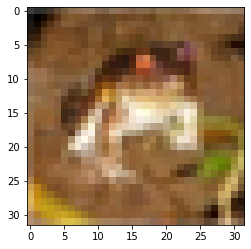

In [6]:
# FROG
plt.imshow(x_train[0])

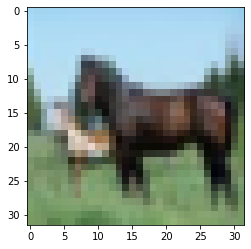

In [7]:
# HORSE
plt.imshow(x_train[12])

# PreProcessing

In [8]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [9]:
x_train[0].shape

(32, 32, 3)

In [10]:
x_train.max()

255

In [11]:
x_train = x_train/225

In [12]:
x_test = x_test/255

In [13]:
x_train.shape

(50000, 32, 32, 3)

In [14]:
x_test.shape

(10000, 32, 32, 3)

## Labels

In [15]:
from tensorflow.keras.utils import to_categorical

In [16]:
y_train.shape

(50000, 1)

In [17]:
y_train[0]

array([6], dtype=uint8)

In [18]:
y_cat_train = to_categorical(y_train,10)

In [19]:
y_cat_train.shape

(50000, 10)

In [20]:
y_cat_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [21]:
y_cat_test = to_categorical(y_test,10)

----------
# Building the Model

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [23]:
model = Sequential()

## FIRST SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

## SECOND SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 256 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(256, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        16416     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 256)               2

In [25]:
from tensorflow.keras.callbacks import EarlyStopping

In [26]:
early_stop = EarlyStopping(monitor='val_loss',patience=3)

In [27]:
model.fit(x_train,y_cat_train,epochs=15,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/15
1563/1563 [==============================] - 46s 29ms/step - loss: 1.4966 - accuracy: 0.4649 - val_loss: 1.2818 - val_accuracy: 0.5500
Epoch 2/15
1563/1563 [==============================] - 52s 33ms/step - loss: 1.1524 - accuracy: 0.5970 - val_loss: 1.2021 - val_accuracy: 0.5769
Epoch 3/15
1563/1563 [==============================] - 62s 40ms/step - loss: 1.0071 - accuracy: 0.6494 - val_loss: 1.1688 - val_accuracy: 0.6096
Epoch 4/15
1563/1563 [==============================] - 64s 41ms/step - loss: 0.9038 - accuracy: 0.6921 - val_loss: 1.0021 - val_accuracy: 0.6544
Epoch 5/15
1563/1563 [==============================] - 55s 35ms/step - loss: 0.8220 - accuracy: 0.7174 - val_loss: 1.0282 - val_accuracy: 0.6458
Epoch 6/15
1563/1563 [==============================] - 58s 37ms/step - loss: 0.7605 - accuracy: 0.7411 - val_loss: 1.0826 - val_accuracy: 0.6448
Epoch 7/15
1563/1563 [==============================] - 65s 42ms/step - loss: 0.7105 - accuracy: 0.7597 - val_loss: 0.9586 -

In [45]:
# Careful, don't overwrite our file!
model.save('cifar_10epochs.h5')

In [29]:
losses = pd.DataFrame(model.history.history)

In [30]:
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,1.496561,0.46486,1.281832,0.5500
1,1.152431,0.59700,1.202088,0.5769
2,1.007095,0.64944,1.168798,0.6096
3,0.903827,0.69212,1.002138,0.6544
4,0.822007,0.71738,1.028230,0.6458


<AxesSubplot:>

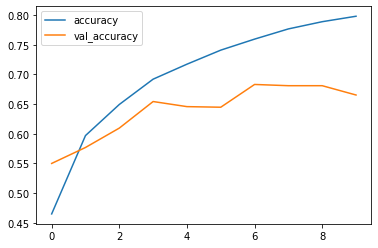

In [31]:
losses[['accuracy','val_accuracy']].plot()

<AxesSubplot:>

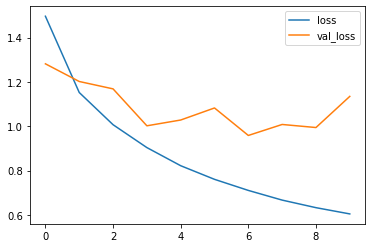

In [32]:
losses[['loss','val_loss']].plot()

In [33]:
model.metrics_names

['loss', 'accuracy']

In [34]:
print(model.metrics_names)
print(model.evaluate(x_test,y_cat_test,verbose=0))

['loss', 'accuracy']
[1.1348782777786255, 0.6654000282287598]


In [35]:
from sklearn.metrics import classification_report,confusion_matrix

predictions =  np.argmax(model.predict(x_test), axis=-1)

313/313 [==============================] - 2s 6ms/step


In [36]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.74      0.69      0.71      1000
           1       0.90      0.68      0.77      1000
           2       0.58      0.54      0.56      1000
           3       0.53      0.46      0.49      1000
           4       0.45      0.85      0.59      1000
           5       0.60      0.51      0.55      1000
           6       0.73      0.75      0.74      1000
           7       0.79      0.67      0.72      1000
           8       0.83      0.72      0.77      1000
           9       0.76      0.79      0.77      1000

    accuracy                           0.67     10000
   macro avg       0.69      0.67      0.67     10000
weighted avg       0.69      0.67      0.67     10000



In [37]:
confusion_matrix(y_test,predictions)

array([[690,   8,  59,  21,  92,  13,  12,  17,  52,  36],
       [ 26, 678,  22,  20,  37,  14,  23,   5,  31, 144],
       [ 63,   2, 536,  47, 196,  60,  59,  25,   7,   5],
       [ 16,   3,  80, 459, 177, 133,  81,  27,  12,  12],
       [  9,   2,  40,  31, 855,  21,  12,  23,   7,   0],
       [  4,   1,  76, 178, 149, 506,  33,  43,   7,   3],
       [  4,   1,  39,  44, 142,  13, 747,   7,   1,   2],
       [ 10,   2,  31,  30, 179,  55,  12, 669,   3,   9],
       [ 79,  24,  26,  23,  42,   8,  26,   7, 722,  43],
       [ 33,  31,  20,  15,  26,  16,  13,  24,  30, 792]], dtype=int64)

<AxesSubplot:>

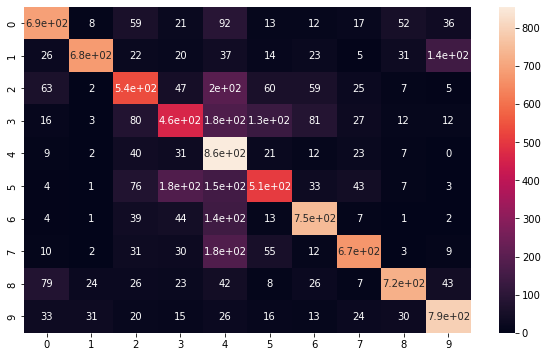

In [38]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)
# https://github.com/matplotlib/matplotlib/issues/14751

# Predicting a given image

In [39]:
my_image = x_test[16]

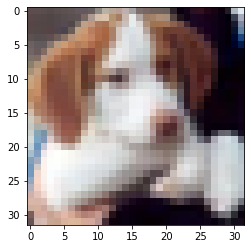

In [40]:
plt.imshow(my_image)

In [44]:
# SHAPE --> (num_images,width,height,color_channels)
np.argmax(model.predict(x_test), axis=-1)

313/313 [==============================] - 2s 6ms/step


array([3, 8, 9, ..., 2, 4, 7], dtype=int64)

In [ ]:
# 5 is DOG
# https://www.cs.toronto.edu/~kriz/cifar.html